<a href="https://colab.research.google.com/github/Chin-I/OnlineLearning/blob/master/Ch1_finlab_crypto_hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup


In [ ]:
#"!pip install" only be used in jupyter ipynb file.
#If you want to execute in the terminal, use "pip install".
!pip install finlab_crypto > log.txt

In [ ]:
import finlab_crypto
# Set up the initial development environment
finlab_crypto.setup()

# Download History Data

### how to use "get_all_binance" func?
You could adjust the following parameters to download data.
1.   symbol (str): trading pair (ex: BTCUSDT)
2.   kline_size (str): frequency of the price data (ex: "1m", "5m",'15m', '30m', "1h", '2h', "4h", "1d")






In [ ]:
ohlcv = finlab_crypto.crawler.get_all_binance('BTCUSDT', '4h')

All caught up..!


In [ ]:
#head default value is 5, if you want to show top 10 columns,use head(10).if you want to show last 5 columns, use "tail".
ohlcv.head()

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17 04:00:00+00:00,4261.48,4349.99,4261.32,4349.99,82.088865,1.502957e+12,3.531943e+05,334.0,64.013727,275647.421911,8048.127886
2017-08-17 08:00:00+00:00,4333.32,4485.39,4333.32,4427.30,63.619882,1.502971e+12,2.825012e+05,248.0,58.787633,261054.051154,8020.698096
2017-08-17 12:00:00+00:00,4436.06,4485.39,4333.42,4352.34,174.562001,1.502986e+12,7.742388e+05,858.0,125.184133,555419.758061,8133.190658
2017-08-17 16:00:00+00:00,4352.33,4354.84,4200.74,4325.23,225.109716,1.503000e+12,9.652911e+05,986.0,165.036363,707808.200922,8425.112852
2017-08-17 20:00:00+00:00,4307.56,4369.69,4258.56,4285.08,249.769913,1.503014e+12,1.079545e+06,1001.0,203.226685,878286.968557,8733.911395


# Create Entry signal and exit signal

1.   [rooling api reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)
2.   [mean api reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)
3.   [shift api reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html):

  Number of periods to shift can be positive or negative.
4.[plot api reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

5. [astype api reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)


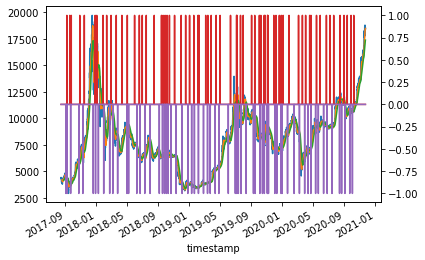

In [ ]:
# get close series from ohlcv dataframe
close = ohlcv.close

# calculate Simple Moving Average(SMA)
sma20 = close.rolling(20).mean()
sma60 = close.rolling(60).mean()

# calculate entries & exits conditions to get sigal, use "shift" calculate previous conditions to get cross signal.
entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())

# show plot
close.plot()
sma20.plot()
sma60.plot()
entries.astype(int).plot(secondary_y=True)
(-exits.astype(int)).plot(secondary_y=True)

# Backtest

1.  [vectorbt api reference](https://polakowo.io/vectorbt/docs/index.html)
2.   [Profolio object](https://polakowo.io/vectorbt/docs/portfolio/base.html#content)
3.   [portfolio.positions.records columns meanings](vectorbt.records.events)

In [ ]:
import vectorbt as vbt

portfolio = vbt.Portfolio.from_signals(close, entries, exits, freq='4h')

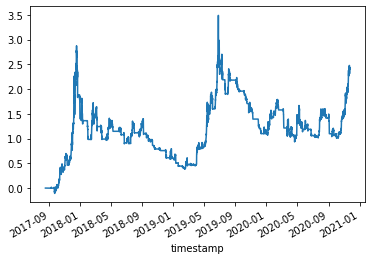

In [ ]:
# Diff:cumulative_returns is func in vectorbt==0.14.4, not method, so the code is different from vedio.
portfolio.cumulative_returns().plot()

In [ ]:
# get trading detail
# Diff:positions is func in vectorbt==0.14.4, not method, so the code is different from vedio.
portfolio.positions().records

# Strategy Function

In [ ]:
# output format is tuple
def sma_strategy(ohlcv):
  close = ohlcv.close
  sma20 = close.rolling(20).mean()
  sma60 = close.rolling(60).mean()

  entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
  exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())
  return entries, exits



In [ ]:
sma_strategy(ohlcv)

(timestamp
 2017-08-17 04:00:00+00:00    False
 2017-08-17 08:00:00+00:00    False
 2017-08-17 12:00:00+00:00    False
 2017-08-17 16:00:00+00:00    False
 2017-08-17 20:00:00+00:00    False
                              ...  
 2020-11-22 12:00:00+00:00    False
 2020-11-22 16:00:00+00:00    False
 2020-11-22 20:00:00+00:00    False
 2020-11-23 00:00:00+00:00    False
 2020-11-23 04:00:00+00:00    False
 Name: close, Length: 7148, dtype: bool, timestamp
 2017-08-17 04:00:00+00:00    False
 2017-08-17 08:00:00+00:00    False
 2017-08-17 12:00:00+00:00    False
 2017-08-17 16:00:00+00:00    False
 2017-08-17 20:00:00+00:00    False
                              ...  
 2020-11-22 12:00:00+00:00    False
 2020-11-22 16:00:00+00:00    False
 2020-11-22 20:00:00+00:00    False
 2020-11-23 00:00:00+00:00    False
 2020-11-23 04:00:00+00:00    False
 Name: close, Length: 7148, dtype: bool)

## [What is decorator?](https://book.pythontips.com/en/latest/decorators.html)

Decorator is widely used in various libraries/packages and has several main advantages:
1. High flexibility
2. High legibility
3. Good encapsulation effect
4. Low code repetition rate/high simplicity

**You can think of it as a decorator to let the function get plug-in functions**

In the following example, we add @Strategy on sma_strategy to let sma_strategy function get finlab_crypto.Strategy method like backtest,plot....

In [ ]:
from finlab_crypto import Strategy
import numpy as np

# adjust sma1, sma2 in decorator or use variables parameter in backtest func like variables = {'sma1': 20, 'sma2': 60}
@Strategy(sma1=20, sma2=60)
def sma_strategy(ohlcv):
  close = ohlcv.close
  sma20 = close.rolling(sma_strategy.sma1).mean()
  sma60 = close.rolling(sma_strategy.sma2).mean()

  entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
  exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())

  figures = {
      'overlaps': {
          'sma20': sma20,
          'sma60': sma60
      }
  }
  return entries, exits, figures

# choose plot=True, you could get beatiful interactive canvas plot(by pyechart)
portfolio = sma_strategy.backtest(ohlcv, freq='4h', plot=True)

# Strategy Optimization Dashboard

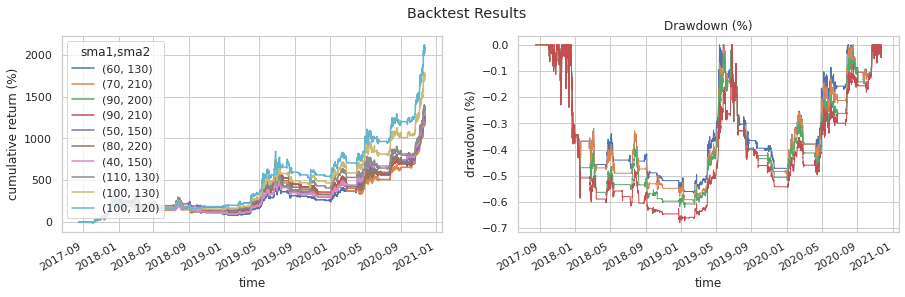

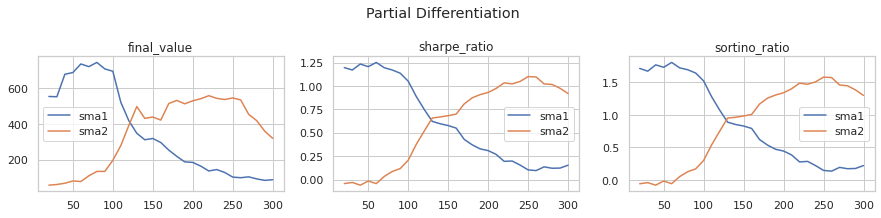

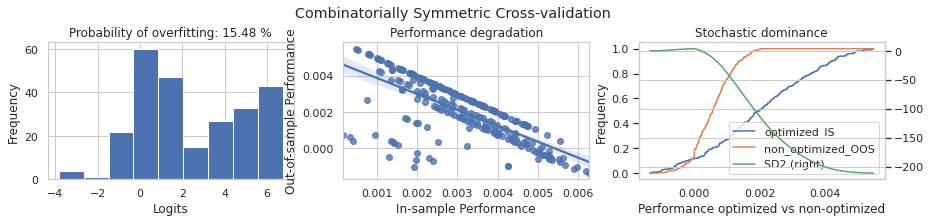

Output()

In [ ]:
# add variables and use numpy to calculate parameters optimization
# Diff:The info about Probability is overfitting... is move to title at bottom left chart, not print below the green prosess bar graph.
# Diff:final_value() is replace to final_equity() in vectorbt==0.14.4,so the code is different from vedio.

variables = {'sma1': np.arange(20, 310, 10), 'sma2': np.arange(20, 310, 10)}
portfolio = sma_strategy.backtest(ohlcv, variables=variables, freq='4h', plot=True)